In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for sheet in misinfotext_file.sheet_names:
        if not "_proportion" in sheet:
            continue

        df = pd.read_excel(misinfotext_file, sheet_name=sheet)
        df["year"] = (sheet.replace("_proportion", ""))
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for sheet in fakespeak_file.sheet_names:
        if not "_proportion" in sheet:
            continue

        df = pd.read_excel(fakespeak_file, sheet_name=sheet)
        df["year"] = (sheet.replace("_proportion", ""))
        yield df

In [6]:
years_dfs = list(get_years_dfs(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_quotes.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_quotes.xlsx",
))

In [7]:
years_dfs[0]

,factcheckURL,proportion_quote_words_to_total_words,year
0,http://www.politifact.com/truth-o-meter/statem...,0.329412,2009
1,http://www.politifact.com/truth-o-meter/statem...,0.068208,2009
2,http://www.politifact.com/truth-o-meter/statem...,0.216651,2009
3,http://www.politifact.com/truth-o-meter/statem...,0.407407,2009
4,http://www.politifact.com/truth-o-meter/statem...,0.012113,2009
5,http://www.politifact.com/truth-o-meter/statem...,0.207469,2009
6,http://www.politifact.com/truth-o-meter/statem...,0.172199,2009
7,http://www.politifact.com/truth-o-meter/statem...,0.166814,2009
8,http://www.politifact.com/truth-o-meter/statem...,0.164557,2009
9,http://www.politifact.com/truth-o-meter/statem...,0.106608,2009


Graph to see if normally distributed

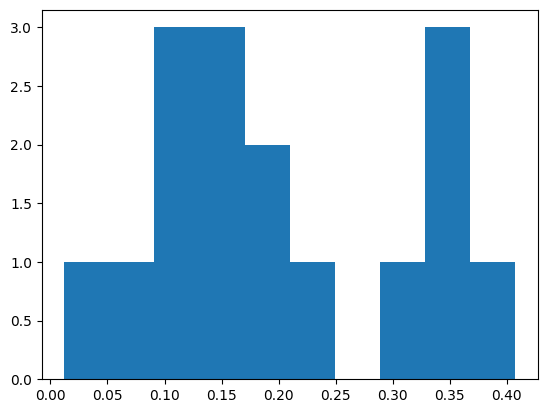

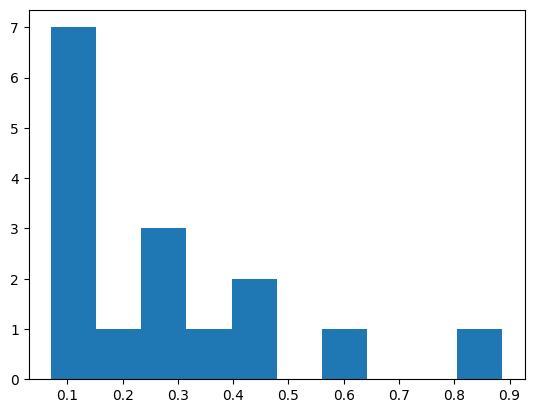

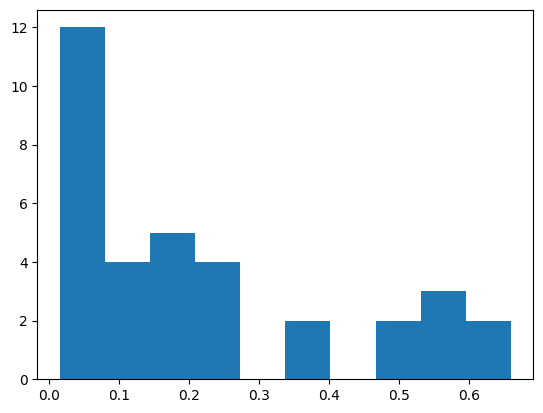

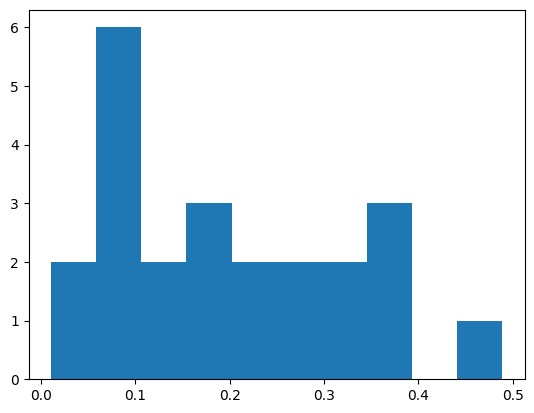

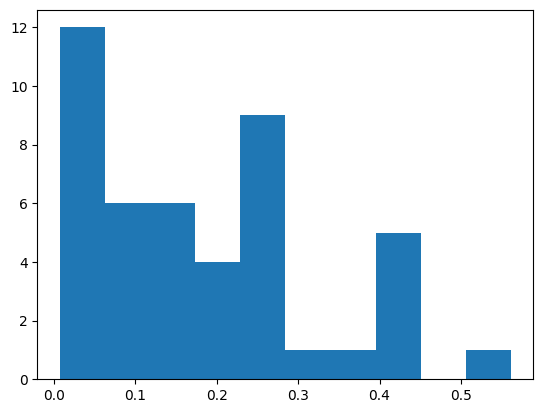

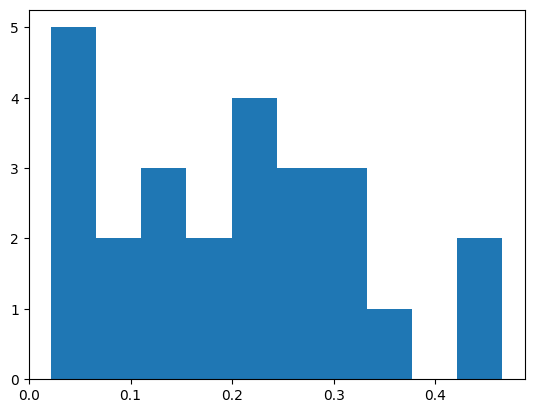

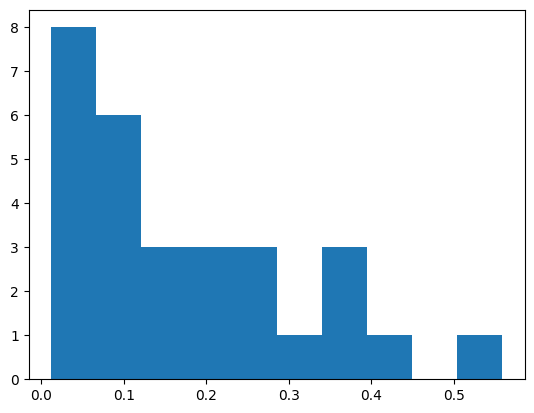

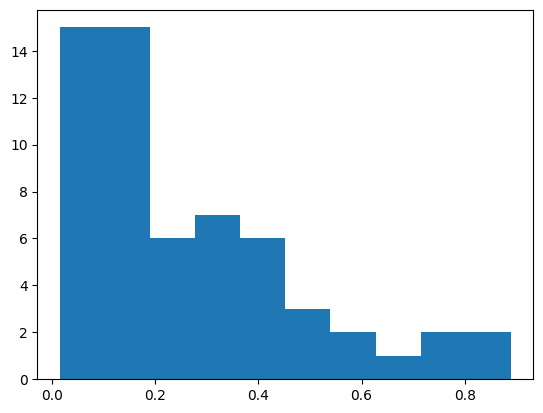

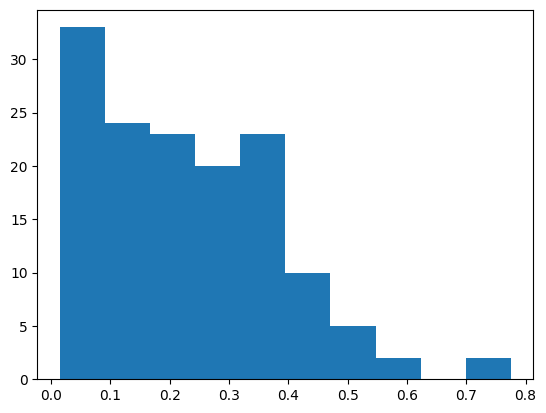

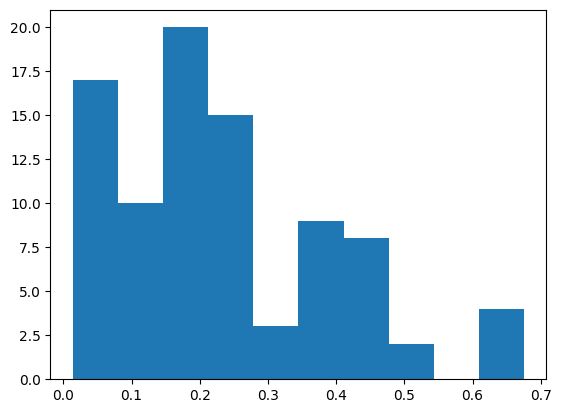

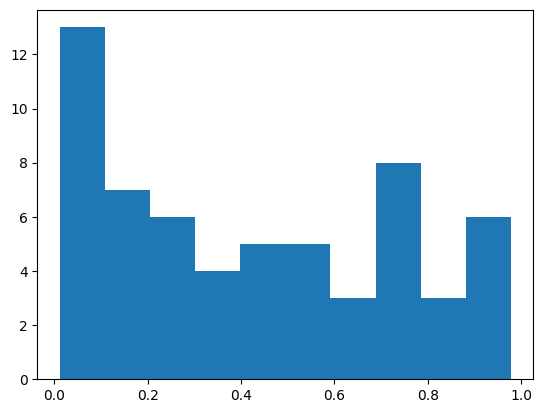

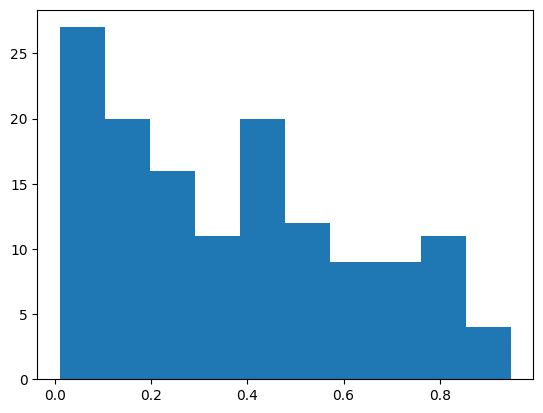

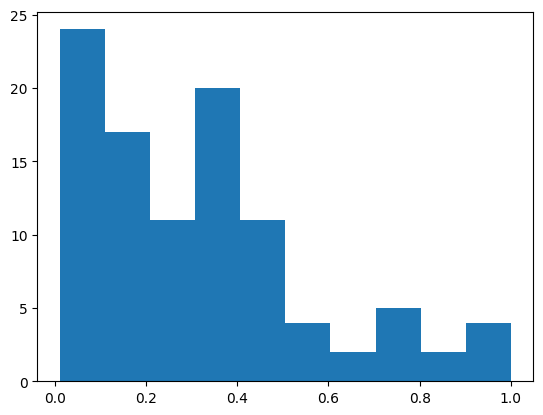

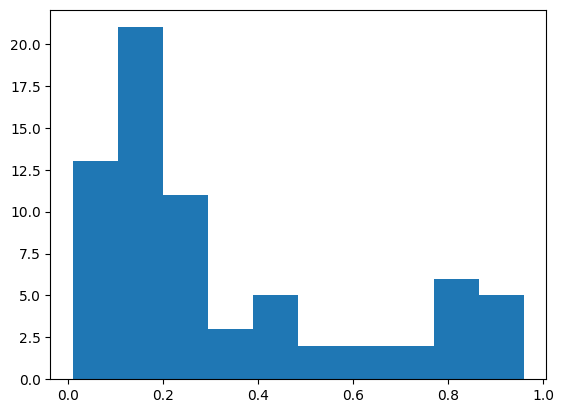

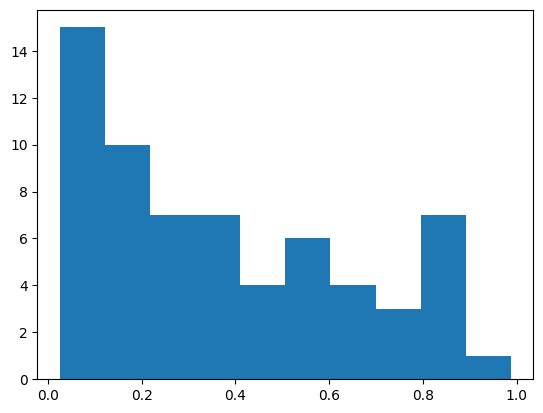

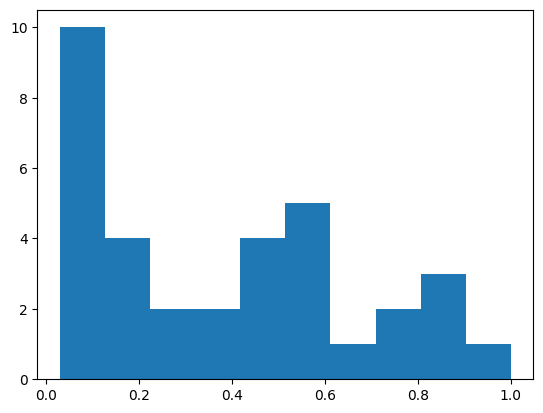

In [8]:
for df in years_dfs:
    plt.figure()
    plt.hist(df["proportion_quote_words_to_total_words"])

Not normally distributed, so need to use a non-parametric test

In [9]:
from scipy.stats import kruskal

In [10]:
kruskal(*[df["proportion_quote_words_to_total_words"] for df in years_dfs])

KruskalResult(statistic=65.57328740416482, pvalue=2.7106154869423513e-08)

There is a statistically significant difference in quotes word count proportions between the years